In [3]:
display(HTML("<style>.rendered_html.text_cell_render {max-width:700px; }</style>"));

HTML{String}("<style>.rendered_html.text_cell_render {max-width:700px; }</style>")

# Create Observations along path

In [1]:
push!(LOAD_PATH, "src");
using MyUtils
using Geometry
import JSON
using Colors, Plots
col = palette(:default);

fname = "data/path_data_big.json"
d = JSON.parsefile(fname)

has_clutter = true

println(keys(d))

segs    = segments(Array{Float64}.(d["verts"]));
if has_clutter
    clutter = vcat([segments(Array{Float64}.(v)) for v in d["clutter_verts"]]...)
end
paths = [Array{Float64}.(path) for path in d["paths"]];

["env_name", "verts", "paths", "clutter_verts"]


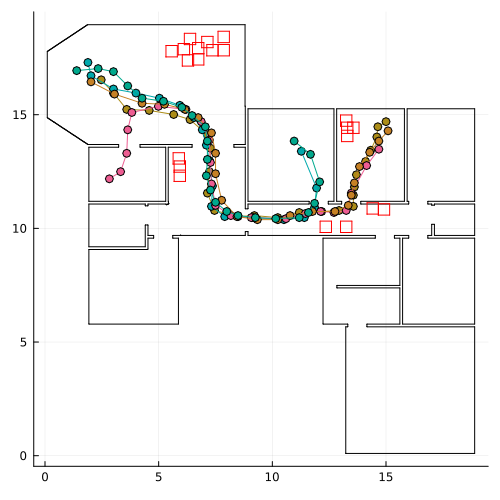

In [2]:
myplot = plot(size=(500,500), aspect_ratio=:equal)
plot!(segs, label=nothing, c="black")
if has_clutter
    plot!(clutter, label=nothing, c="red")
end
for path in paths[:]
    plot!(path, marker=:o, label=nothing)
end
myplot

(18,)(18,)(17,)(17,)


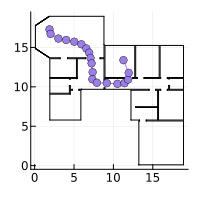

In [3]:
# Choose path
i = 2
path = paths[i]

# Unpack path into 
# poses and controls
xs   = path
dxs  = xs[2:end] - xs[1:end-1]
hds  = angle.(dxs)
dhds = hds[2:end] - hds[1:end-1];
xs   = xs[1:end-1]
dxs  = dxs[1:end-1]


println(size(xs), size(hds), size(dxs), size(dhds))
    
plot(size=(200,200), aspect_ratio=:equal)
plot!(segs, label=nothing, c="black")
plot!(path, marker=:o, label=nothing)

In [5]:
data = Dict(
    :env => Dict(
        :segs => segs,
        :clutter => clutter
    ),
    :motion => Dict(
        :x => xs,
        :hd => hds,
        :dx => dxs,
        :dhd => dhds
    ),
)

using JLD2
fname = "data/data_4.jld2"
save_object(fname, data)

## Unpack Data

In [10]:
#nbx --fname="src/unpack_data.jl"
push!(LOAD_PATH, "src");
using JLD2
using StatsBase: mean
using Geometry: bounding_box, Segment
using GridSlam: Pose, Measurement, Control

fname = "data/data_4.jld2"
d = load_object(fname)

# Environment
_segs   = env_segs = d[:env][:segs];
_boxes  = env_segs = d[:env][:clutter];
_center = mean(bounding_box(_segs))

# Poses
_xs   = d[:motion][:x];
_hds  = d[:motion][:hd];
_ps   = [Pose(x,hd) for (x,hd) in zip(_xs, _hds)];

# Controls
_dxs  = d[:motion][:dx]
_dhds = d[:motion][:dhd]
_us   = [Control(dx,dhd) for (dx,dhd) in zip(_dxs, _dhds)]

_T = length(_xs);

In [29]:
#nbx
println("Loading `$(fname)` ...\n")
for x in [:_segs, :_boxes, :_xs, :_hds, :_ps, :_dxs, :_dhds, :_us, :_T]
    local y = getproperty(Main,x)
    println("\t$(x) \t$(typeof(y))")
end
println("\nTo take a look call `glimpse_at_data(_segs, _boxe, _ps)`")

Loading `data/data_4.jld2` ...

	_segs 	Vector{Segment}
	_boxes 	Vector{Segment}
	_xs 	Vector{Vector{Float64}}
	_hds 	Vector{Float64}
	_ps 	Vector{Pose}
	_dxs 	Vector{Vector{Float64}}
	_dhds 	Vector{Float64}
	_us 	Vector{Control}
	_T 	Int64

To take a look call `glimpse_at_data(_segs, _boxe, _ps)`


In [30]:
#nbx
using Colors, Plots
col = palette(:default);

function glimpse_at_data(_segs, _boxes, _ps)
    # -----------------
    myplot = plot(size=(350,350), aspect_ratio=:equal, legend=false)
    plot!(_segs, c=:black)
    plot!(_boxes, c=:red)
    plot!([p.x for p in _ps], marker=:o, label=nothing, markersize=2, c=col[1], alpha=1.)
    display(myplot)
end;

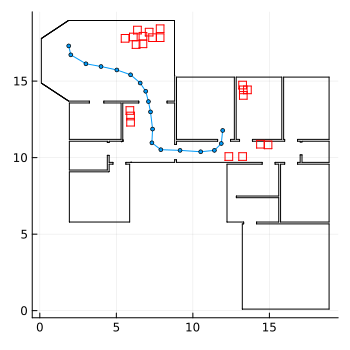

In [31]:
glimpse_at_data(_segs,_boxes, _ps)